In [1]:
# import all of the necessary libraries
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, max_error, accuracy_score
from sklearn import metrics
from sklearn.tree import plot_tree
import graphviz
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
fin = pd.read_csv('/content/simulated_financial_forecasting_data.csv')

# Observe first five rows
fin.head()

,sales,market_indicator_1,market_indicator_2,gdp_growth,unemployment_rate,inflation_rate,target_sales
0,5496.714153,227.987109,46.624109,2.046096,4.136506,1.788120,3259.678899
1,4861.735699,218.492674,49.277407,2.569807,4.968797,1.773293,2924.423879
2,5647.688538,201.192607,46.037900,2.793197,5.018017,1.102178,3359.368677
3,6523.029856,187.061264,48.460192,3.943844,5.472630,1.834955,3919.982731
4,4765.846625,213.964466,40.531927,3.278277,3.633142,2.366415,2906.335477


In [3]:
# check data types
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sales               1000 non-null   float64
 1   market_indicator_1  1000 non-null   float64
 2   market_indicator_2  1000 non-null   float64
 3   gdp_growth          1000 non-null   float64
 4   unemployment_rate   1000 non-null   float64
 5   inflation_rate      1000 non-null   float64
 6   target_sales        1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


## Descriptive Analysis

In [4]:
# gather basic statistics
fin.describe()

,sales,market_indicator_1,market_indicator_2,gdp_growth,unemployment_rate,inflation_rate,target_sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5019.332056,201.416725,50.029171,2.990640,4.950726,1.976631,3074.211516
std,979.215938,19.949088,4.917271,0.513566,0.992380,0.503695,592.873492
min,1758.732660,141.192227,34.902439,1.535276,1.823296,0.550243,1108.306272
25%,4352.409695,187.875166,46.760002,2.631290,4.317395,1.653154,2653.591678
50%,5025.300612,201.261543,49.998746,3.000092,4.981758,1.978586,3082.117935
75%,5647.943875,214.577644,53.304577,3.333473,5.639123,2.306223,3469.584629
max,8852.731491,263.862151,69.631189,4.621546,8.112910,3.549150,5321.161136


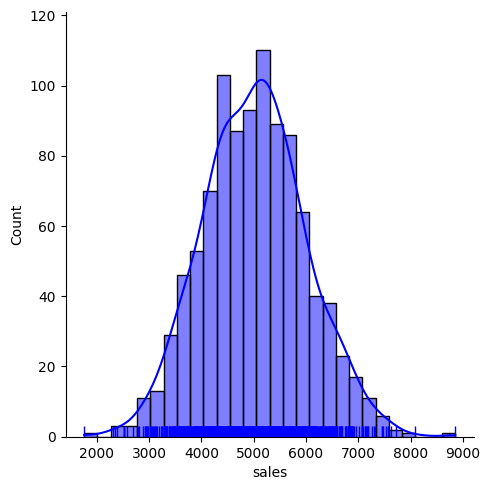

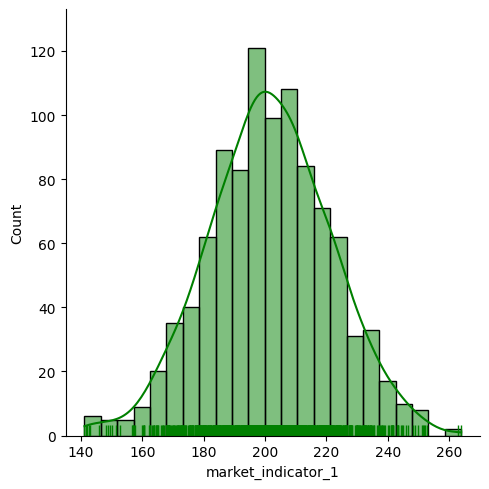

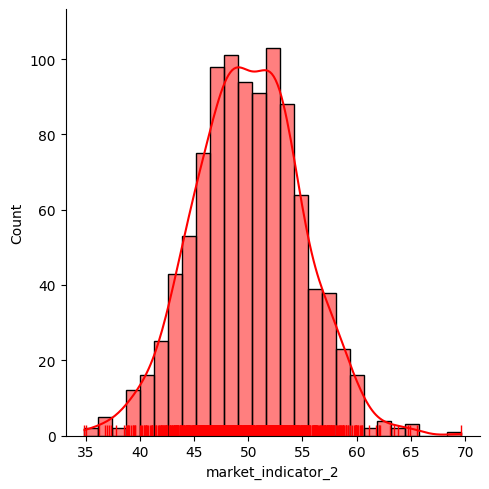

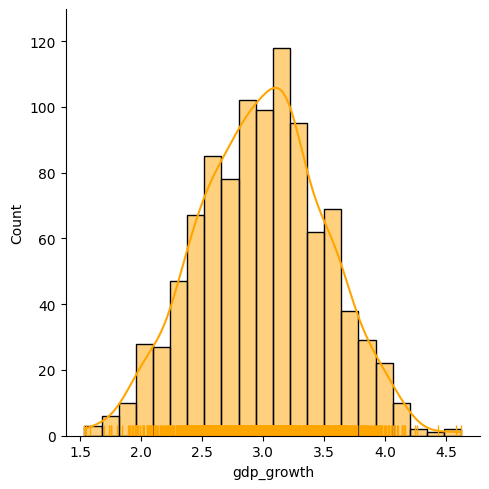

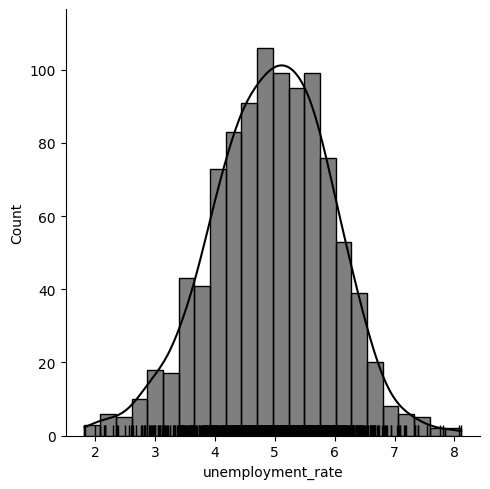

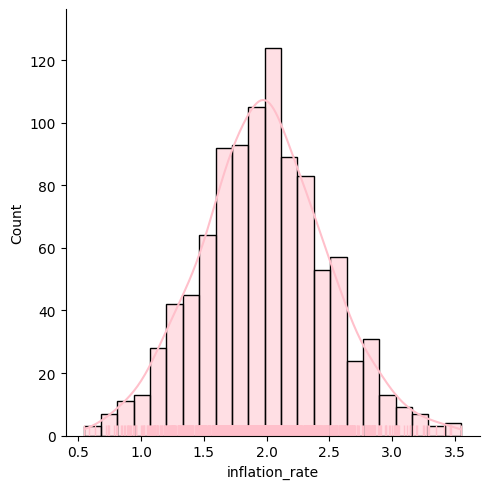

In [5]:
# create multiple plots of economic indictators
for column, color, label in zip(['sales', 'market_indicator_1', 'market_indicator_2','gdp_growth','unemployment_rate','inflation_rate'],
 ['blue', 'green', 'red','orange','black','pink'], ['Distribution 1', 'Distribution 2', 'Distribution 3','Distribution 4','Distribution 5','Distribution 6']):
    sns.displot(fin[column], kde=True, rug=True, color=color, label=label)

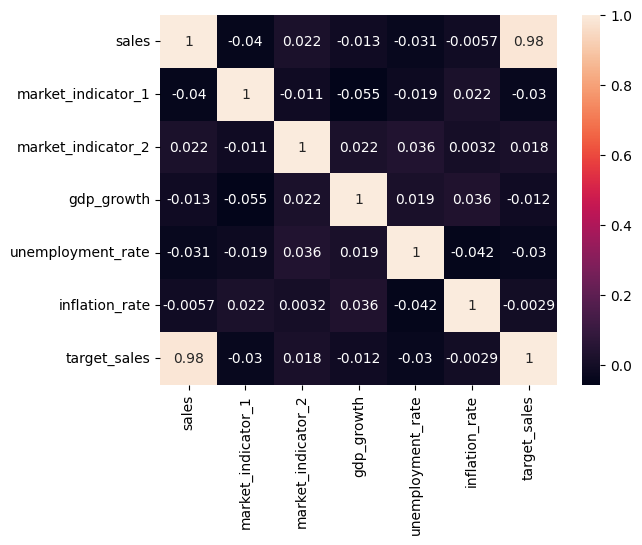

In [6]:
# create a correlation map
finm = fin.corr().round(5)
sns.heatmap(finm, annot=True)
plt.show()

## Random Forest Regressor

In [7]:
# create a feature and target variable
X = fin.drop('target_sales', axis=1)
y = fin['target_sales']

In [8]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# initializing the Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=120, random_state=42)

# training the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [10]:
# making predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
median_absolute_error = median_absolute_error(y_test, y_pred)
explained_variance_score = explained_variance_score(y_test, y_pred)
max_error = max_error(y_test, y_pred)

# printing evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Median Absolute Error (MedAE): {median_absolute_error}")
print(f"Explained Variance Score: {explained_variance_score}")
print(f"Max Error: {max_error}")

Mean Squared Error (MSE): 12512.43720254692
R-squared (R2) Score: 0.9626351781421214
Median Absolute Error (MedAE): 66.18020892400637
Explained Variance Score: 0.9627139213093396
Max Error: 627.365477467958


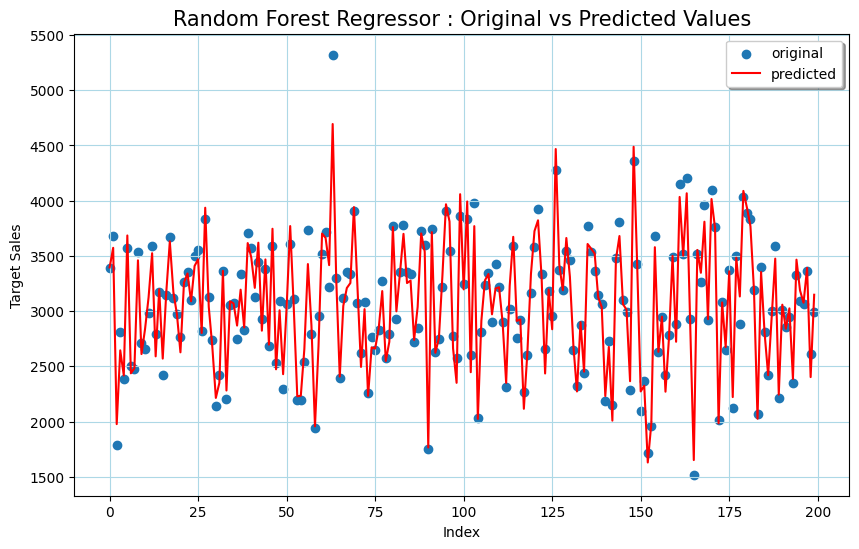

In [11]:
# plotting the original vs predicted values
x_ax = range(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(x_ax, y_test,  label="original")
plt.plot(x_ax, y_pred, 'r',  label="predicted")
plt.title("Random Forest Regressor : Original vs Predicted Values", fontsize = 15)
plt.xlabel("Index")
plt.ylabel("Target Sales")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True, color = 'lightblue')
plt.show()

## Gradient Boosting Regressor



In [12]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# initialize the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.18, random_state=42)

# train the model
gbm.fit(X_train, y_train)

# make predictions
y_pred = gbm.predict(X_test)

# evaluate model performance and print the results
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
accuracy_score = gbm.score(X_test, y_test)
print(f"Accuracy Score: {accuracy_score}")
print(f"Median Absolute Error: {metrics.median_absolute_error(y_test, y_pred)}")
print(f"Explained Variance Score: {metrics.explained_variance_score(y_test, y_pred)}")
print(f"Max Error: {metrics.max_error(y_test, y_pred)}")

Mean Squared Error: 12299.3834192038
R-squared: 0.9632714024469389
Accuracy Score: 0.9632714024469389
Median Absolute Error: 70.8580417623914
Explained Variance Score: 0.9632722593175687
Max Error: 453.82459202103655


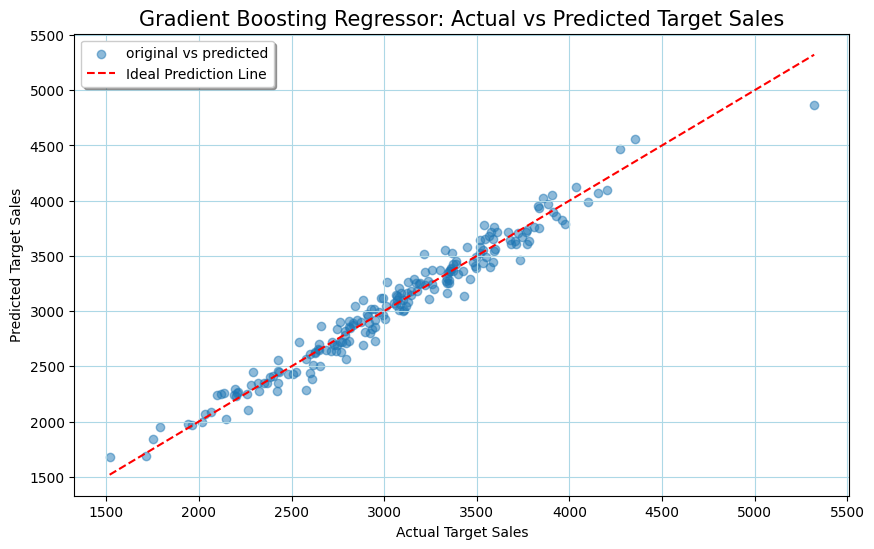

In [14]:
# plotting the original vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred,  label="original vs predicted", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Prediction Line")
plt.title("Gradient Boosting Regressor: Actual vs Predicted Target Sales", fontsize = 15)
plt.xlabel("Actual Target Sales")
plt.ylabel("Predicted Target Sales")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True, color = 'lightblue')
plt.show()

## Ridge Regression

In [15]:
# define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

# fit model
model.fit(X, y)

# display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [16]:
# calculate and print the accuracy score
accuracy_score = model.score(X_test, y_test)
print(f"Accuracy Score: {accuracy_score}")

Accuracy Score: 0.9739323471999324


## Lasso Regression

In [17]:
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# fit model
model.fit(X, y)

# display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [18]:
# calculate and print the accuracy score
accuracy_score = model.score(X_test, y_test)
print(f"Accuracy Score: {accuracy_score}")

Accuracy Score: 0.9740157261290515


## Decision Tree Regressor

In [19]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# define model
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [21]:
# fit model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [22]:
# creating the trained decision tree regressor to make predictions on the test data
y_pred = regressor.predict(X_test)

# evaluate model performance and print the results
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")
print(f"Median Absolute Error: {metrics.median_absolute_error(y_test, y_pred):.4f}")
print(f"Explained Variance Score: {metrics.explained_variance_score(y_test, y_pred):.4f}")
print(f"Max Error: {metrics.max_error(y_test, y_pred):.4f}")
print(f"Accuracy Score: {regressor.score(X_test, y_test):.4f}")

Mean Squared Error: 16269.4505
R-squared: 0.9514
Median Absolute Error: 79.0776
Explained Variance Score: 0.9514
Max Error: 713.2015
Accuracy Score: 0.9514


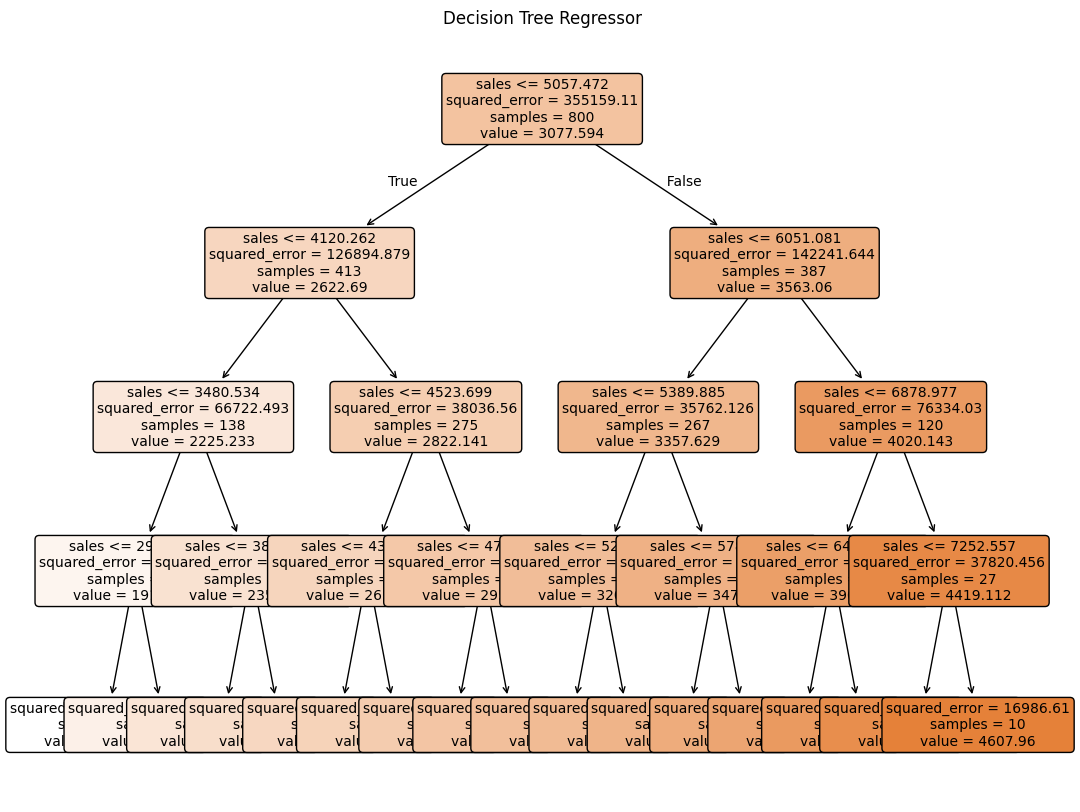

In [23]:
# plot the decision tree using the trained regressor
plt.figure(figsize=(12, 10))
plot_tree(regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Regressor")
plt.show()

## Polynominal Regression

In [24]:
# create a PolynomialFeatures object to generate polynomial features up to degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# fit the polynomial feature generator to the transformed data
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

In [25]:
# evaluate model performance and print the results
print(f"R-squared: {r2_score(y, lin2.predict(X_poly)):.4f}")
print(f"Median Absolute Error: {metrics.median_absolute_error(y, lin2.predict(X_poly)):.4f}") # Changed this line
print(f"Explained Variance Score: {metrics.explained_variance_score(y, lin2.predict(X_poly)):.4f}")
print(f"Max Error: {metrics.max_error(y, lin2.predict(X_poly)):.4f}")
print(f"Accuracy Score: {lin2.score(X_poly, y):.4f}")

R-squared: 0.9730
Median Absolute Error: 67.5785
Explained Variance Score: 0.9730
Max Error: 282.4979
Accuracy Score: 0.9730


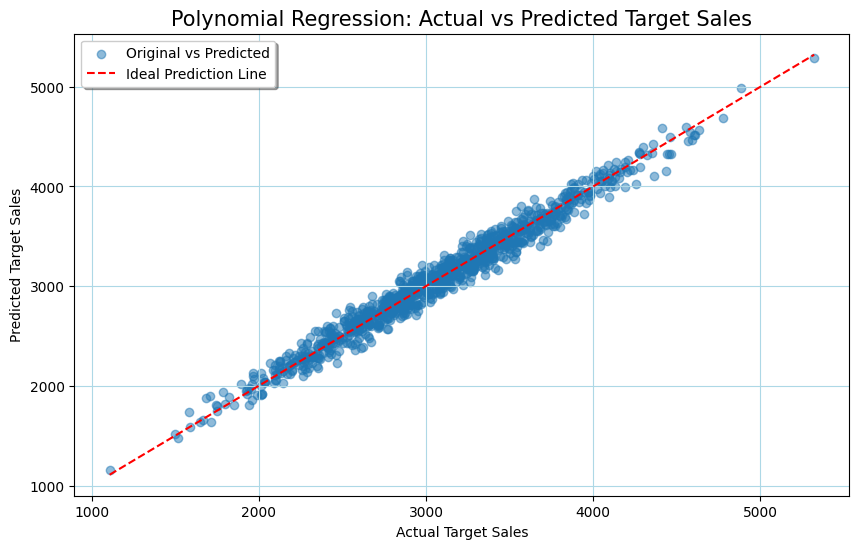

In [26]:
# plotting the original vs predicted values
y_pred_poly = lin2.predict(X_poly)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_poly, label="Original vs Predicted", alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label="Ideal Prediction Line")
plt.title("Polynomial Regression: Actual vs Predicted Target Sales", fontsize = 15)
plt.xlabel("Actual Target Sales")
plt.ylabel("Predicted Target Sales")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True, color='lightblue')
plt.show()

## Recursive Feature Elimination

In [27]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# initialize a model for Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
model = LinearRegression()

# evaluate model performance and print the results
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Median Absolute Error:", metrics.median_absolute_error(y_test, y_pred))
print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

R-squared: 0.9742890489647815
Mean Squared Error: 8952.242775227203
Median Absolute Error: 63.566106894368886
Explained Variance Score: 0.9742915296718924


Citations

https://dnmtechs.com/creating-multiple-distributions-with-seaborns-distplot-displot-in-python-3/

https://datagy.io/python-correlation-matrix/

https://www.datatechnotes.com/2020/09/regression-example-with-randomforestregressor.html

https://medium.com/@ilyurek/gradient-boosting-machines-gbm-with-python-example-b65421d10f2a

https://www.statology.org/ridge-regression-in-python/

https://www.statology.org/lasso-regression-in-python/

https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

https://www.geeksforgeeks.org/recursive-feature-elimination/